## Linear Regression - Stochastic Gradient Descent

### 1. Objective

                To find the house price

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as ss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### 2. Data handling

In [2]:
# Importing Boston data set from sklearn 

# References
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


from sklearn.datasets import load_boston

In [3]:
data=load_boston()

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Feature names 

print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# loading to DataFrame

boston_data=pd.DataFrame(data.data,columns=['CRIM','ZN','INDUS' ,'CHAS' ,'NOX', 'RM' ,'AGE' ,'DIS' ,'RAD' ,'TAX', 'PTRATIO',
 'B' ,'LSTAT'])

In [7]:
boston_data.shape

(506, 13)

In [8]:
# Adding label to the dataframe

boston_data["Price"]=data.target

In [9]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### 3. Data Splitting

In [10]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

In [11]:
X=boston_data.drop("Price",axis=1)
Y=boston_data["Price"]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [13]:
print("train data shape (x_train,y_train)")
print("(",x_train.shape,",",y_train.shape,")")
print("test data shape (x_test,y_test)")
print("(",x_test.shape,",",y_test.shape,")")

train data shape (x_train,y_train)
( (404, 13) , (404,) )
test data shape (x_test,y_test)
( (102, 13) , (102,) )


### 4. Implementation of Stochastic Gradient Descent (SGD) Algorithm from Scratch 

#### 4.1 Data Standardization:

In [14]:
# Data standardization
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [15]:
data_std=StandardScaler()
x_train_std=data_std.fit_transform(x_train)
x_test_std=data_std.transform(x_test)

#### 4.2 Creating Function for SGD

In [16]:
# Refernce for Markdown and  LaTeX
# https://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/jupyter/2.%20Markdown%20%26%20LaTeX.ipynb

####  Stochastic Gradient Descent (SGD) :

* <b>Optimization Problem<b>:

$L = min(w,b) \frac{1}{n}  \sum\limits_{i=0}^{n} (Y_{i} - (w^T*X_{i}+b)^2) $

* <b>After Vector Differentiation<b>:

$\frac{dL}{dw} = \frac{1}{n}  \sum\limits_{i=0}^{n} (-2 * X_{i}) * (Y_{i} - (w^T*X_{i}+b))$

$\frac{dL}{db} = \frac{1}{n}   \sum\limits_{i=0}^{n} (-2) * (Y_{i} - (w^T*X_{i}+b))$

* <b>Gradient Update<b>:

$w_{j+1} = w_{j} - r * (\frac{dL}{dw})_{x_{i}}$

$b_{j+1} = b_{j} - r * (\frac{dL}{db})_{x_{i}}$


##### SGD Working Principle:

* Randomly choose w and b 
* Initialize the learning rate and iteration
* Pick a random set of k points for every iteration, where $1 \leq k \geq n$
* Update gradient for each iteration
* Run a loop untill obtain the minimum w and b

In [17]:
# References for Python Functions:
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/function-arguments/
# https://www.geeksforgeeks.org/functions-in-python/
# https://www.geeksforgeeks.org/g-fact-41-multiple-return-values-in-python/

# Reference for To Generate the random values
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html

In [18]:
# Function for create a k sample for each iteration:

def k_sample(**para):
    
    k_sample_x=[]
    k_sample_y=[]
    
    sample=np.random.randint(0,354,size=para["sample_size"])
    
    fi=para["train_data"]
    la=para["train_label"].values

    for i in sample:
        
        a= list(fi[i])
        b=la[i]
        
        k_sample_x.append(a)
        k_sample_y.append(b)
        
    k_sample_x=np.asarray(k_sample_x)
    k_sample_y=np.asarray(k_sample_y)
    k_sample_y=np.reshape(k_sample_y,(para["sample_size"],1))
    
    return k_sample_x,k_sample_y

In [19]:
# References To generate the the random w and b using Normal Distribution
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html

# References To produce the same set of random values in the Normal distribution
# https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html

# References for SGD Regeressor Implementation
# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
# http://mccormickml.com/2014/03/04/gradient-descent-derivation/
# https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
# https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/ 
# https://github.com/PushpendraSinghChauhan/SGD-Linear-Regression/blob/master/
# https://medium.com/@lachlanmiller_52885 
  #/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd
# https://scikit-learn.org/stable/modules/sgd.html.
# https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent

# Reference for tqdm 
# https://pypi.org/project/tqdm/

In [20]:
# Fuction for finding optimal w , b, mse and cost_list Using Stochastic Gradient Descent Optimization (SGD) Algorithm.

def optimal_w_b(**para):

    # Initializing
    
    size_w = para["train_data"].shape[1]
    np.random.seed(20)
    w = np.random.normal(loc=0,scale=1,size=size_w)
    w = np.reshape(w,(1,size_w))
    b=float(np.random.normal(loc=0,scale=1,size=1))
    r=0.001
    
    w_list = []
    b_list = []
    cost_list = []
    value=para["iteration"]
    
    # Loop for getting a optimul w and b using n iterations

    for i in tqdm(range(0,value)):
    
        # k samples produces for each iteration
        
        k_sample_x,k_sample_y=k_sample(sample_size=para["sample_size"],train_data=para["train_data"],\
                                       train_label=para["train_label"])
    
        n= k_sample_y.shape[0]
    
       
        # Initialization to store the values
        
        grad_w = np.zeros((1,size_w))
        grad_b = 0
        cost = 0
        
        # Loop for produce the error and cost fuction 
        
        for x,y in zip(k_sample_x,k_sample_y):
        
            x=np.reshape(x,(1,size_w))
        
            y=float(y)
        
            pred = np.dot(x,w.T) + b 
        
            error = y - pred
        
            grad_w = grad_w + (x * error)
        
            grad_b = grad_b + (error)
        
            cost = cost + ((error)**2)
        
        dl_dw = (-2/n) * grad_w
    
        dl_db = (-2/n) * grad_b
    
        cost_value = (1/n) * (cost)
    
        w = w - ( r * dl_dw)
    
        b = b - (r * dl_db)
    
        # Storing w and b which will get each iterations
        
        w_list.append(w)
        b_list.append(b)
        cost_list.append(float(cost_value))
        
    # Optimal w,b,mse
    
    w_optimum=np.asarray(w_list[-1])
    w_optimum= w_optimum[0]
    b_optimum =np.asarray(b_list[-1])
    b_optimum = float(b_optimum)
    mse = np.asarray(cost_list[-1])
    mse=float(mse)
    
    # Function Return values (w,b,mse,cost_list)
    
    return w_optimum,b_optimum,mse,cost_list

In [21]:
# Fuction for Predict the test data using optimal w,b

def SGD_Regressor_custom(**para):
    
    # list to store the predicted value
    
    pred_list =[]
    cost=0
    w=para["optimal_w"]
    b=para["optimal_b"]
    
    # loop for Predict the test data using optimal w and b
    
    for x,y in zip(para["test_data"],para["test_label"]):
        
        size = para["test_data"].shape[1]
        
        n= para["test_data"].shape[0]
        
        x=np.reshape(x,(1,size))
        
        y=float(y)
        
        pred = np.dot(x,w.T) + b
        
        error = y - pred
        
        # MSE
        
        cost = cost + ((error)**2)
        
        pred_list.append(float(pred))
        
    mse = (1/n) * (cost)
    
    predict_value = np.asarray(pred_list)
    
    # Return predicted values
    
    return predict_value,float(mse)

In [22]:
# Finding optimal w,b,mse and cost_list

w_optimum,b_optimum,mse_train,cost_list=optimal_w_b(iteration=2000,sample_size=20,train_data=x_train_std,train_label=y_train)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1948.82it/s]


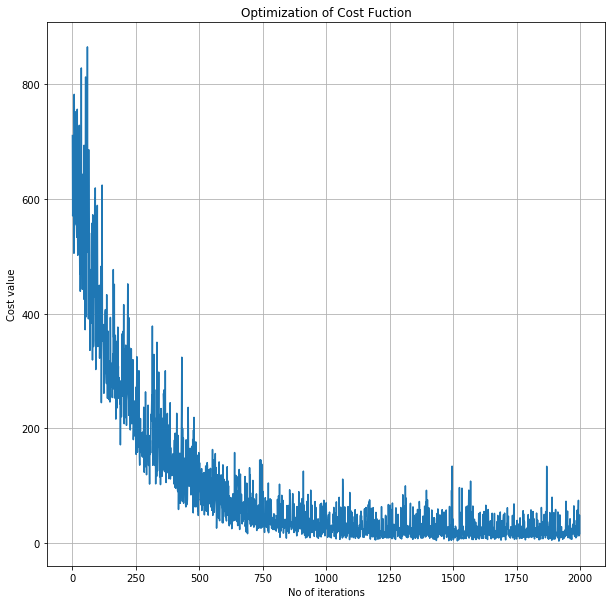

In [23]:
# Plotting cost values for each iteration

plt.close()
plt.figure(figsize=(10,10))
plt.plot(range(0,2000),cost_list)
plt.grid()
plt.xlabel("No of iterations")
plt.ylabel("Cost value")
plt.title("Optimization of Cost Fuction")
plt.show()

##### Observation:

* If the number of iteration increases, The MSE (Cost) value become reduced.

In [24]:
# Predict the test data using manually optimized w and b

y_custom,mse=SGD_Regressor_custom(optimal_w=w_optimum,optimal_b=b_optimum,test_data=x_test_std,test_label=y_test)

In [25]:
print(" the Optimal weight vector of manually implemented SGD")
print("="*125)
print(w_optimum)
print(" ")
print(" the Optimal y intercept of manually implemented SGD")
print("="*125)
print(b_optimum)
print(" ")
print("The mse value of manually implemented SGD")
print("="*125)
print(mse)

 the Optimal weight vector of manually implemented SGD
[-0.77812515  0.40610261 -0.27094832  0.98905431 -1.40834991  2.89629074
  0.64666167 -2.14462645  1.23314931 -0.4524809  -1.79102283  0.73413303
 -4.31336998]
 
 the Optimal y intercept of manually implemented SGD
22.035944435479514
 
The mse value of manually implemented SGD
21.770055179819852


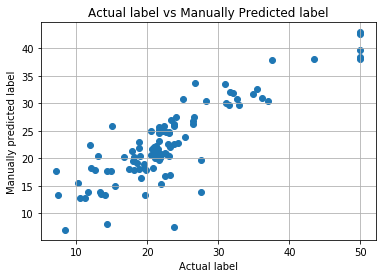

In [26]:
# Plot for actual values vs manually predicted values

plt.close()
plt.scatter(y_test,y_custom)
plt.grid()
plt.title("Actual label vs Manually Predicted label")
plt.xlabel("Actual label")
plt.ylabel("Manually predicted label")
plt.show()

In [27]:
delta= y_test - y_custom

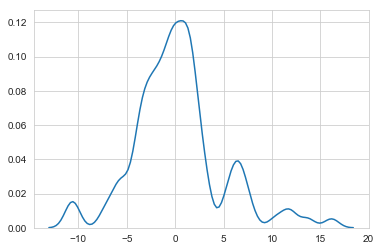

In [28]:
# Plotting the error difference (delta)

plt.close()
sns.set_style("whitegrid")
sns.kdeplot(np.array(delta),bw=.75)
plt.show()

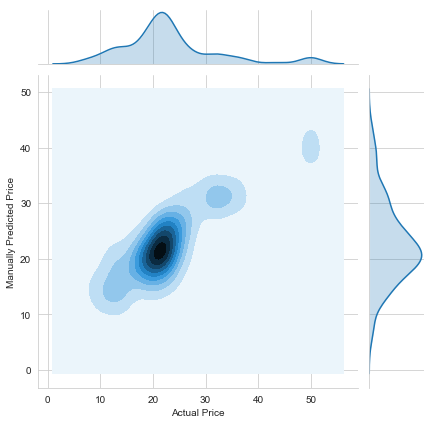

In [29]:
plt.close()
sns.set_style("whitegrid")
fig=sns.jointplot(x=y_test,y=y_custom,kind="kde")
fig.set_axis_labels('Actual Price', 'Manually Predicted Price')
plt.show()

##### Observation:

* There is maximum number of actual price points lies between 15 to 35 and the maximum number of predicted price also lies between 15 to 35.

### 5. Implementation of Stochastic Gradient Descent (SGD) Algorithm using Sklearn 

In [30]:
# References 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model
    #.SGDRegressor.predict

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [32]:
# Fitting a data to find optimal w and b

model = SGDRegressor(max_iter=2000)
model.fit(x_train_std,y_train)
w_sklearn=model.coef_
b_sklearn=model.intercept_

In [33]:
# Predicting using sklearn model

y_sklearn = model.predict(x_test_std)
mse_sklearn = mean_squared_error(y_test,y_sklearn)

In [34]:
print(" the Optimal weight vector of sklearn implemented SGD")
print("="*125)
print(w_sklearn)
print(" ")
print(" the Optimal y intercept of sklearn implemented SGD")
print("="*125)
print(b_sklearn)
print(" ")
print("The mse value of sklearn implemented SGD")
print("="*125)
print(mse_sklearn)

 the Optimal weight vector of sklearn implemented SGD
[-0.89026351  1.09447669  0.22292746  0.79080819 -2.07301744  2.5906061
  0.4253591  -3.0260349   2.83140261 -2.26526786 -1.74512239  0.82982324
 -4.10515481]
 
 the Optimal y intercept of sklearn implemented SGD
[22.39845869]
 
The mse value of sklearn implemented SGD
20.697499465228088


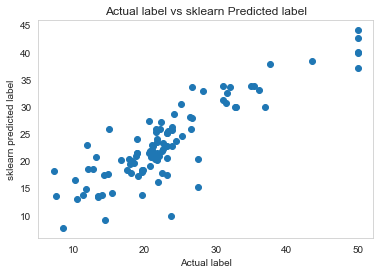

In [35]:
# Plot for actual values vs sklearn predicted values

plt.close()
plt.scatter(y_test,y_sklearn)
plt.title("Actual label vs sklearn Predicted label")
plt.xlabel("Actual label")
plt.ylabel("sklearn predicted label")
plt.grid()
plt.show()

In [36]:
delta= y_test - y_sklearn

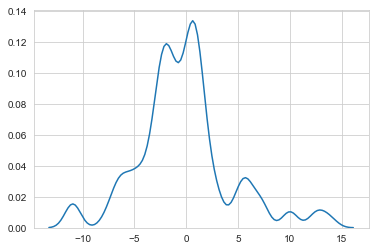

In [37]:
# Plotting the error difference (delta)

plt.close()
sns.set_style("whitegrid")
sns.kdeplot(np.array(delta),bw=.75)
plt.show()

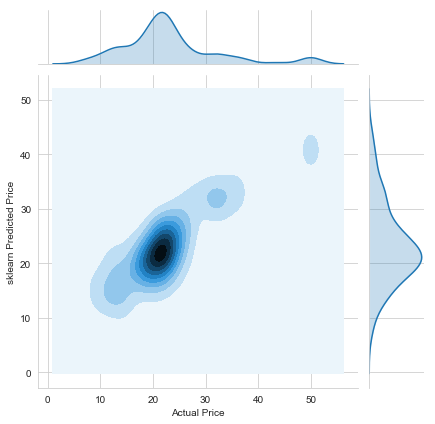

In [38]:
plt.close()
sns.set_style("whitegrid")
fig=sns.jointplot(x=y_test,y=y_sklearn,kind="kde")
fig.set_axis_labels('Actual Price', 'sklearn Predicted Price')
plt.show()

##### Observation:

* There is maximum number of actual price points lies between 15 to 35 and the maximum number of predicted price also lies between 15 to 35.

### 6. Plot for Manually predicted price vs sklearn predicted price

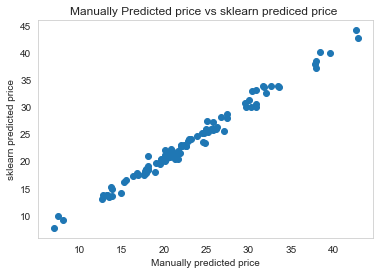

In [39]:
plt.close()
plt.scatter(y_custom,y_sklearn)
plt.grid()
plt.title("Manually Predicted price vs sklearn prediced price ")
plt.xlabel("Manually predicted price")
plt.ylabel("sklearn predicted price")
plt.show()

##### Observation:

* The Manually implemented SGD predicted price result is almost similar to sklearn SGD predicted price result.

### 7. Comparing the weight, Y intercept and MSE value of both Own implemented and sklearn implemented SGD

In [40]:
# References
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

In [41]:
x=PrettyTable()

print("Weight vector Comparision of Both Own and sklearn SGD")
print("="*125)
print(" ")
x.add_column("w_number",[1,2,3,4,5,6,7,8,9,10,11,12,13])
x.add_column("Own implemented SGD",w_optimum)
x.add_column("Sklearn implemented SGD",w_sklearn)
print(x)
print(" ")

y=PrettyTable()
print("Intercept term Comparision of Both Own and sklearn SGD")
print("="*125)
print(" ")
y.field_names = ["Own implemented SGD","Sklearn implemented SGD"]
y.add_row([b_optimum,float(b_sklearn)])
print(y)
print(" ")

z=PrettyTable()
print("Mean Squared Error (MSE) Comparision of Both Own and sklearn SGD")
print("="*125)
print(" ")
z.field_names = ["Own implemented SGD","Sklearn implemented SGD"]
z.add_row([mse,mse_sklearn])
print(z)

Weight vector Comparision of Both Own and sklearn SGD
 
+----------+----------------------+-------------------------+
| w_number | Own implemented SGD  | Sklearn implemented SGD |
+----------+----------------------+-------------------------+
|    1     | -0.7781251457258265  |   -0.8902635085492697   |
|    2     | 0.40610260560092964  |    1.0944766909203094   |
|    3     | -0.2709483201622593  |   0.22292745871764355   |
|    4     |  0.9890543074816439  |    0.7908081888790354   |
|    5     | -1.4083499099728076  |   -2.0730174402774324   |
|    6     |  2.896290736365398   |    2.590606104948634    |
|    7     |  0.6466616709004404  |   0.42535910289107054   |
|    8     | -2.1446264485357767  |   -3.0260349006825153   |
|    9     |  1.233149306672518   |    2.8314026125613125   |
|    10    | -0.45248089722126733 |   -2.2652678636620687   |
|    11    |  -1.791022828399871  |   -1.7451223890598617   |
|    12    |   0.73413302991548   |    0.8298232361144502   |
|    13    |  

### 9. Conclusion

* The Boston data set is loaded/imported from sklearn dataset. After imported the dataset it have 506 datapoints and 13 features and one label column. we split data points for Train and Test for the shape of 404 and 102 respectively.
* After splitting the data, the standardization implemented in the training data.
* Then we implement our own SGD from scratch using Linear regression Optimiation function with 2000 iterations. Finally we get the optimal weight vector(w) and Y Intercept term(b).
* Using these w and b we predict our test data. Then compared the actual price and Own SGD predicted price.
* We get the MSE of our own implemented SGD is  21.77. 
* After that we implementing SGD using sklearn with 2000 iterations. similarly we get the optimal weight vector(w) and Y Intercept term(b) of sklearn SGD.
* Using sklearn Model we predict the test data.After we comapared actual price and Sklearn SGD price.
* We get the MSE of SKlearn implemented SGD is  20.69.
* After that we plot the Own and Sklearn SGD predicted price.Using this plot we conclude predicted values of both Own and Sklearn SGD are almost similar.
* The Both Own and Sklearn implemented SGD Produce almost similar Weight vector,Intercept term and MSE value. So the Both Predicted values are almost similar.